# Data Cleansing: Predicting sales outcome

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:

import types 
import pandas as pd 
from botocore.client import Config 
import ibm_boto3 
def __iter__(self): return 0 
# @hidden_cell 
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials. 
# You might want to remove those credentials before you share the notebook. 
client_d812e9ff73554acb99ec832832ddfe49 = ibm_boto3.client(service_name='s3', 
                                                           ibm_api_key_id='-rPWCJ6tlad28m4TQMS_rhBCiHbQ4d2agItYcfqgqzen', 
                                                           ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token", 
                                                           config=Config(signature_version='oauth'), 
                                                           endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_d812e9ff73554acb99ec832832ddfe49.get_object(Bucket='progpy19cabd749c62e43b992119d84b67f744f',Key='Modeling Data Set for XYZ.xlsx')['Body'] 
# add missing __iter__ method, so pandas accepts body as file-like object 
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body ) 
df_data_1 = pd.read_excel(body)

In [3]:
df_data_0 = df_data_1 # 

In [4]:
#Checkout the top 5 rows if data is same as expected
df_data_0.head()

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition
0,23226186,49,49,0,0,0,0,0,49,0,...,1.0,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training
1,23244325,42,42,0,0,0,0,42,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
2,23235268,45,45,0,0,0,0,45,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
3,23235330,135,135,0,0,0,0,135,0,0,...,0.0,0.0,0.0,0.0,1,1,1,XYZ,CXG_XYZ,2_Testing
4,23235456,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXS_XYZ,2_Testing


In [5]:
#What kind of data do we have?
df_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161465 entries, 0 to 161464
Data columns (total 36 columns):
KEY                            161465 non-null int64
OPP_Natural Age                161465 non-null int64
Age since SSM Validated        161465 non-null int64
Age before SSM Validated       161465 non-null int64
SSM_1 _ELXAPSED_DAYS           161465 non-null int64
SSM_2 _ELXAPSED_DAYS           161465 non-null int64
SSM_3 _ELXAPSED_DAYS           161465 non-null int64
SSM_4 _ELXAPSED_DAYS           161465 non-null int64
SSM_5 _ELXAPSED_DAYS           161465 non-null int64
OPP_Backward count             161465 non-null int64
OPP_Forward count              161465 non-null int64
DTL_Natural Age                161465 non-null int64
RM_STATUS_Count                161465 non-null int64
RdM_NIR_ELXAPSED_DAYS          161465 non-null int64
RdM_STR_ELXAPSED_DAYS          161465 non-null int64
RdM_KEY_ELXAPSED_DAYS          161465 non-null int64
RdM_ATR_ELXAPSED_DAYS          161465 non

In [6]:
#Checkout the statistical properties of data
df_data_0.describe()

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Backward quarter_count,Roller_FLXAg_NUM,Chronic_Roller_FLXAg,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME
count,1.614650e+05,161465.000000,161465.000000,161465.000000,161465.000000,161465.000000,161465.000000,161465.000000,161465.000000,161465.000000,...,159725.000000,159725.000000,159725.000000,159725.000000,159725.000000,159725.000000,159725.000000,161465.000000,161465.0,161465.000000
mean,2.297564e+07,155.069755,135.884898,19.184857,1.362103,16.296163,82.763738,49.200619,4.948856,0.115635,...,0.062558,2.829482,0.267948,0.477020,0.000301,0.006805,0.247926,0.989428,1.0,0.641099
std,4.918815e+05,167.371009,149.276738,64.799680,16.902323,58.266037,122.210245,94.779911,27.488035,0.467308,...,0.271077,1.788587,0.442892,0.499473,0.017333,0.082214,0.431810,0.104255,0.0,0.479680
min,1.970884e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,2.278096e+07,40.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
50%,2.304828e+07,102.000000,86.000000,0.000000,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
75%,2.329160e+07,211.000000,184.000000,0.000000,0.000000,0.000000,119.000000,57.000000,0.000000,0.000000,...,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000
max,2.385669e+07,1412.000000,1412.000000,1078.000000,893.000000,1078.000000,1288.000000,1134.000000,783.000000,11.000000,...,6.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.0,1.000000


In [13]:
#Is data unique or redundant
df_data_0.duplicated().sum()

0

In [14]:
#Is there any empty rows or column
df_data_0.empty

False

In [7]:
#Check out the data shape
Row, Col = df_data_0.shape
print(f'The Data has {Row} rows and {Col} columns.')

The Data has 161465 rows and 36 columns.


In [8]:
#Are there any null values?
print(df_data_0.isna().sum())
df_data_0.isna().sum().max()

KEY                               0
OPP_Natural Age                   0
Age since SSM Validated           0
Age before SSM Validated          0
SSM_1 _ELXAPSED_DAYS              0
SSM_2 _ELXAPSED_DAYS              0
SSM_3 _ELXAPSED_DAYS              0
SSM_4 _ELXAPSED_DAYS              0
SSM_5 _ELXAPSED_DAYS              0
OPP_Backward count                0
OPP_Forward count                 0
DTL_Natural Age                   0
RM_STATUS_Count                   0
RdM_NIR_ELXAPSED_DAYS             0
RdM_STR_ELXAPSED_DAYS             0
RdM_KEY_ELXAPSED_DAYS             0
RdM_ATR_ELXAPSED_DAYS             0
RdM_SOL_ELXAPSED_DAYS             0
RdM_WNR_DAYS                      0
RdM_NonWNR_DAYS                   0
RdM_Forward count                 0
RdM backward count                0
Forward quarter_count          1740
Backward quarter_count         1740
Roller_FLXAg_NUM               1740
Chronic_Roller_FLXAg           1740
Not_Roller_FLXAg               1740
SAXMe_Quarter_Updater_FLXAg 

1740

In [10]:
#Filtering out the null values as we have enough data and we don't need to compromise with the data quality by incorporating data imputation.
df_data_0 = df_data_0.dropna(axis=0, how='any')
df_data_0

,KEY,OPP_Natural Age,Age since SSM Validated,Age before SSM Validated,SSM_1 _ELXAPSED_DAYS,SSM_2 _ELXAPSED_DAYS,SSM_3 _ELXAPSED_DAYS,SSM_4 _ELXAPSED_DAYS,SSM_5 _ELXAPSED_DAYS,OPP_Backward count,...,Not_Roller_FLXAg,SAXMe_Quarter_Updater_FLXAg,Deal_Accelerator_FLXAg,One_Time_Roller_FLXAg,Record_Count,AGE_FLXAG,OUTCOME,BU_CODE,G_BU,Partition
0,23226186,49,49,0,0,0,0,0,49,0,...,1.0,0.0,0.0,0.0,1,1,0,XYZ,EXP_XYZ,1_Training
1,23244325,42,42,0,0,0,0,42,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
2,23235268,45,45,0,0,0,0,45,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
3,23235330,135,135,0,0,0,0,135,0,0,...,0.0,0.0,0.0,0.0,1,1,1,XYZ,CXG_XYZ,2_Testing
4,23235456,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXS_XYZ,2_Testing
5,23236123,44,44,0,0,0,11,33,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,JXN_XYZ,1_Training
6,23236219,136,63,73,0,73,63,0,0,0,...,0.0,0.0,0.0,1.0,1,1,1,XYZ,AXM_XYZ,2_Testing
7,23236893,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training
8,23237142,44,44,0,0,0,44,0,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,EXP_XYZ,2_Testing
9,23237643,44,44,0,0,0,0,44,0,0,...,1.0,0.0,0.0,0.0,1,1,1,XYZ,AXM_XYZ,1_Training


In [11]:
#Check out the data shape again after filtering.
Row, Col = df_data_0.shape
print(f'The Data has {Row} rows and {Col} columns.')

The Data has 159725 rows and 36 columns.


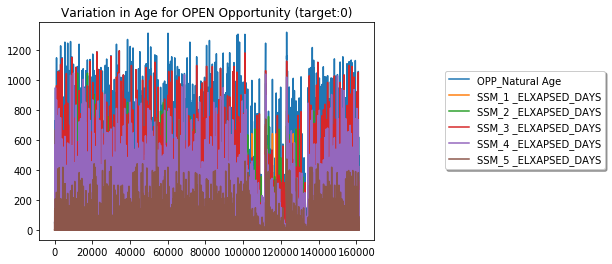

In [32]:
plt.title('Variation in Age for OPEN Opportunity (target:0)')
plt.plot(df_data_0['OPP_Natural Age'][df_data_0['OUTCOME'] == 0])
plt.plot(df_data_0['SSM_1 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 0])
plt.plot(df_data_0['SSM_2 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 0])
plt.plot(df_data_0['SSM_3 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 0])
plt.plot(df_data_0['SSM_4 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 0])
plt.plot(df_data_0['SSM_5 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 0])
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

#df_data_test = df_data_0[df_data_0['Partition'] == "2_Testing"]

#plt.plot(X_t_train[:,1], X_t_train[:,0]) 
plt.show()


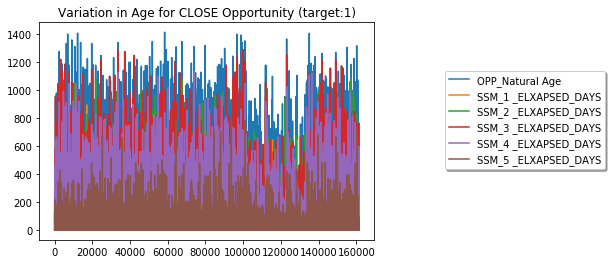

In [31]:
plt.title('Variation in Age for CLOSE Opportunity (target:1)')
plt.plot(df_data_0['OPP_Natural Age'][df_data_0['OUTCOME'] == 1])
plt.plot(df_data_0['SSM_1 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 1])
plt.plot(df_data_0['SSM_2 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 1])
plt.plot(df_data_0['SSM_3 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 1])
plt.plot(df_data_0['SSM_4 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 1])
plt.plot(df_data_0['SSM_5 _ELXAPSED_DAYS'][df_data_0['OUTCOME'] == 1])
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()